## Imports

In [241]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

## Read text

In [242]:
path = 'raw_data/screenplay_data/data/raw_texts/raw_texts/Scooby Doo_0267913.txt'
txt = open(path,'r').read()
txt = txt.replace('\n', ' ')
txt

'   Tea    \x0cSCOOBY -DOO  by Craig Titley  based on characters created by Hanna-Barbera  previous revision by Jay Kogen  new draft by James Gunn  FIRST DRAFT March 17, 2000 WARNER BROS. © 2000 4000 Warner Boulevard WARNER BROS.  Burbank, California 91522 All Rights Reserved \x0cFADE IN:  EXT. SPOOKY ISLAND - NIGHT  A full moon pokes a white hole in a black sky. 0.S. we hear FESTIVE ROCK ‘N ROLL and the WHOOPS and HOLLERS of JOYFUL REVELERS.  We PAN DOWN TO Spooky Island, a tropical island/theme park. This cheesy tourist trap is hardly a Disneyland or Magic Mountain, nor even, sad to say, a Legoland. Like Rome, it was not built in a day. Unlike Rome, it very well likely could have been.  We PASS a colorful Fiberglass “haunted" castle that sits atop a small mountain. We PASS palm trees and huge papier mache heads impaled on stakes. We APPROACH a lit sign that reads: °  WELCO E TO SP ORY ISLAND WHERE FEAR IS Y UR ONLY FRIEND  We MOVE PAST the sign and OUT OVER a crowd of college student

## Tokenizer

In [243]:
from nltk.tokenize import word_tokenize, sent_tokenize

def split_movie_script(movie_file, sentence=True):
    ''' Gets a movie script as an input, cleans \n and returns a DataFrame of sentences of the script
    '''

    path = './raw_data/screenplay_data/data/raw_texts/raw_texts/'

    # reading the movie script
    movie_script = open(path + movie_file,'r').read()

    # cleaning \n chars
    movie_script_cleaned = ' '.join(movie_script.split('\n'))

    # returning the DataFrame of sentences
    return pd.DataFrame(sent_tokenize(movie_script_cleaned))

In [244]:
data = split_movie_script('Up_1049413.txt')
data = data.rename(columns={0:'script'})
data

,script
0,...
1,A 1930's NEWSREEL.
2,NEWSREEL ANNOUNCER (V.O.)
3,"""Movietown News"" presents..."
4,Spotlight on Adventure!
...,...
2760,CARL Maybe I need new glas...
2761,"Overhead, MUNTZ'S DIRIGIBLE is parked, its lad..."
2762,DISSOLVE TO: EXT.
2763,PARADISE FALLS - AFTERNOON ...


## Cut text

In [245]:
# l = len(txt)
# n = 20
# ran = np.arange(0,l,n)
# ran

In [246]:
# parts = []

# for r in ran:
#         parts.append(txt[r:r+n])

# len(parts)

## DataFrame

In [247]:
# data = pd.DataFrame(parts, columns=['script'])

In [248]:
data

,script
0,...
1,A 1930's NEWSREEL.
2,NEWSREEL ANNOUNCER (V.O.)
3,"""Movietown News"" presents..."
4,Spotlight on Adventure!
...,...
2760,CARL Maybe I need new glas...
2761,"Overhead, MUNTZ'S DIRIGIBLE is parked, its lad..."
2762,DISSOLVE TO: EXT.
2763,PARADISE FALLS - AFTERNOON ...


In [249]:
k = 100
ran = np.arange(0, len(data), k)
ran

aa = data.iloc[:5,0].values
b = ''
for a in aa:
    b += a
b

'                                                     UP                                                Written by                               Pete Docter, Bob Peterson &amp; Thomas McCarthy                                                                                            1.A 1930\'s NEWSREEL.NEWSREEL ANNOUNCER (V.O.)"Movietown News" presents...Spotlight on Adventure!'

In [250]:
result = []
for r in ran:
    aux = ''
    sentences = data.iloc[r:r+k,0]
    for sen in sentences:
        aux += sen
    result.append(aux)
result = pd.DataFrame(result, columns=['script'])

## Model

In [251]:
analyzer = SentimentIntensityAnalyzer()
result['result'] = data.script.apply(lambda x: analyzer.polarity_scores(x))
result['neg'] = data.script.apply(lambda x: analyzer.polarity_scores(x)['neg'])
result['neu'] = data.script.apply(lambda x: analyzer.polarity_scores(x)['neu'])
result['pos'] = data.script.apply(lambda x: analyzer.polarity_scores(x)['pos'])
result['compound'] = data.script.apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [252]:
# result.iloc[49,0]

IndexError: index 49 is out of bounds for axis 0 with size 28

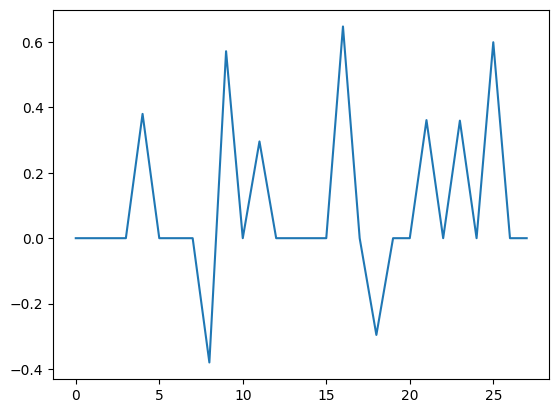

In [260]:
# plt.plot(result.index, result.neg)
# plt.plot(result.index, result.pos)
# plt.plot(data.index, data.neu)
plt.plot(result.index, result.compound)
plt.show()